# VGG Net 응용

In [2]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions

In [3]:
vgg16 = VGG16()
vgg16.summary()

553467096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

- 이미지 예측

In [4]:
import numpy as np
from PIL import Image
from google.colab import files
up = files.upload()

Saving cat.jpg to cat.jpg


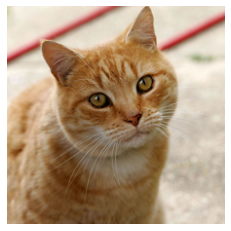

In [5]:
import matplotlib.pyplot as plt

img = Image.open('cat.jpg').resize((224,224))
plt.imshow(img), plt.axis('off');

In [7]:
yhat = vgg16.predict(np.array(img).reshape(-1, 224, 224, 3))
label = decode_predictions(yhat)
yhat.shape

1/1 [==============================] - 1s 532ms/step


(1, 1000)

In [8]:
label       # 상위 5개의 값을 보여줌

[[('n02124075', 'Egyptian_cat', 0.541753),
  ('n02123045', 'tabby', 0.36030483),
  ('n02123159', 'tiger_cat', 0.050835963),
  ('n02127052', 'lynx', 0.020637799),
  ('n03958227', 'plastic_bag', 0.004847229)]]

In [9]:
label[0][0][1], label[0][0][2]

('Egyptian_cat', 0.541753)

- landscape image

In [10]:
up = files.upload()

Saving lion.jpg to lion.jpg


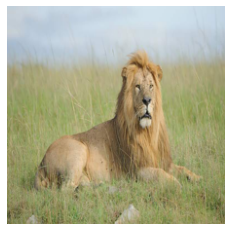

In [12]:
img = Image.open('lion.jpg').resize((224,224))
plt.imshow(img), plt.axis('off');

In [13]:
yhat = vgg16.predict(np.array(img).reshape(-1, 224, 224, 3))
label = decode_predictions(yhat)
label[0][0][1], label[0][0][2]

1/1 [==============================] - 1s 1s/step


('lion', 0.5989512)

- 이미지를 224 x 224 크기로 자르기

In [14]:
IMAGE_SIZE = 224

def center_image(img):
    h, w, _ = np.array(img).shape
    if h > w:
        width, height = IMAGE_SIZE, (h * IMAGE_SIZE) // w
    else:
        width, height = (w * IMAGE_SIZE) // h, IMAGE_SIZE
    new_img = np.array(img.resize((width, height)))

    diff = abs(width - height) // 2
    final_img = new_img[:, diff:diff+IMAGE_SIZE, :] if width > height else new_img[diff:diff+IMAGE_SIZE, :, :]
    return final_img

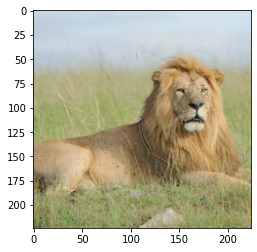

In [15]:
img2 = Image.open('lion.jpg')
img2 = center_image(img2)
plt.imshow(img2);

In [16]:
yhat = vgg16.predict(np.array(img2).reshape(-1, 224, 224, 3))
label = decode_predictions(yhat)
label[0][0][1], label[0][0][2]

1/1 [==============================] - 1s 867ms/step


('lion', 0.99870706)